In [1]:
import time
from sklearn.preprocessing import StandardScaler
from keras.datasets import fashion_mnist
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2022-12-08 09:26:02.184919: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train.reshape(x_train.shape[0],-1))
X_test_scaled = scaler.fit_transform(x_test.reshape(x_test.shape[0],-1))


In [3]:
start = time.time()

#most tuned svm
svm = SVC(kernel="rbf", C=12.1, gamma=0.000372759, random_state=1)
svm.fit(X_train_scaled, y_train)

end = time.time()
print("Time taken to train SVC = " + str(end - start))

Time taken to train SVC = 232.84315586090088


In [4]:
start = time.time()

#most tuned ann
tuned_ann = MLPClassifier(hidden_layer_sizes=(128),
                    activation='relu',
                    alpha=0.1072267222,
                    learning_rate_init=0.06579332,
                    random_state=1)
tuned_ann.fit(X_train_scaled, y_train.flatten())

end = time.time()
print("Time taken to train ANN = " + str(end - start))

Time taken to train ANN = 9.027170181274414


In [7]:
metrics = pd.DataFrame(index=["SVM","ANN"])
metrics.at["SVM", "Time"] = 232.84315586090088
metrics.at["ANN", "Time"] = 9.027170181274414

<AxesSubplot: >

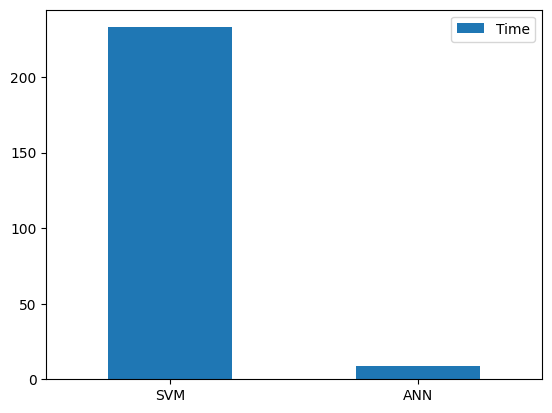

In [10]:
metrics.plot.bar(rot=0)

In [13]:
print('Training accuracy of SVM: ', round(svm.score(X_train_scaled, y_train.flatten()),4))
print('Testing accuracy of SVM: ', round(svm.score(X_test_scaled, y_test.flatten()),4))

print('Training accuracy of ANN: ', round(tuned_ann.score(X_train_scaled, y_train.flatten()),4))
print('Testing accuracy of ANN: ', round(tuned_ann.score(X_test_scaled, y_test.flatten()),4))


Training accuracy of SVM:  0.9386
Testing accuracy of SVM:  0.887
Training accuracy of ANN:  0.7523
Testing accuracy of ANN:  0.7431
